<a href="https://colab.research.google.com/github/ManvithaNagothu/ML-Project/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# IMPORTING THE NECESSARY LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


# describe() Method is used for generating descriptive statistics of a
#DataFrame or Series in Python




In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum().max()

0

In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Printing The Number of Fraud cases percentage and Valid_Transcation Percentage**

In [13]:
print('Valid Transaction Cases Consist :-', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Cases Consist of :-', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Valid Transaction Cases Consist :- 99.83 % of the dataset
Fraud Cases Consist of :- 0.17 % of the dataset


In [14]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transaction Cases: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transaction Cases: 284315



**This dataset presents transactions where we have 492 frauds out of 284,315 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA; The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

 **Data imbalance in machine learning (ML) refers to a situation where the number of instances in one class of a binary classification problem is much smaller than the number of instances in the other class. For example, if we have a dataset of customer transactions and we want to predict whether a transaction is fraudulent or not, we may have only a few examples of fraudulent transactions compared to the non-fraudulent ones.**

Data imbalance can also occur in multi-class classification problems, where the number of instances in one or more classes is much smaller than the others. This can cause a significant problem because most ML algorithms are designed to assume that the classes in the dataset are balanced. If the dataset is imbalanced, the algorithm may be biased towards the majority class, resulting in poor performance on the minority class.

 To deal with data imbalance in ML, there are various techniques that can be used, such as oversampling the minority class, undersampling the majority class, or using algorithms specifically designed to handle imbalanced data, such as cost-sensitive learning, anomaly detection, or ensemble methods.

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

**Scaling is a preprocessing step in machine learning that involves transforming the features of a dataset so that they have a similar scale. It is a crucial step because many machine learning algorithms, such as k-nearest neighbors and support vector machines, use distance-based measures to determine the similarity between samples. When features have different scales, these algorithms may give more weight to features with larger scales, even if they are not necessarily more important for the task at hand.**

StandardScaler is a scaling technique that standardizes the data by subtracting the mean and dividing by the standard deviation. This technique makes the data have a mean of zero and a standard deviation of one. The formula for standardizing data using StandardScaler is:

*x_standardized = (x - mean) / standard_deviation *

where x is the original value, mean is the mean of all values in the feature, and standard_deviation is the standard deviation of all values in the feature.

**RobustScaler is a scaling technique that scales the data using statistics that are robust to outliers. This technique is useful when the data contains many outliers that can affect the scaling. RobustScaler subtracts the median and divides by the interquartile range (IQR). The formula for scaling data using RobustScaler is:**

'x_scaled = (x - median) / IQR'

where x is the original value, median is the median of all values in the feature, and IQR is the interquartile range, which is the difference between the 75th and 25th percentiles of the values in the feature.

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('Valid Transaction Cases', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Cases', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]



# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Valid Transaction Cases 99.83 % of the dataset
Fraud Cases 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [18]:
data = df

In [19]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
117543,1.962272,-0.117236,1.165025,-0.852542,-0.396060,-0.529680,-0.527389,-0.501970,0.061877,-0.364427,...,-0.066555,-0.393853,-0.806515,-0.262995,-0.362019,0.535862,1.122819,-0.089989,0.019549,0
68067,6.957312,-0.374511,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,...,1.230278,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,1
157920,-0.277789,0.304585,1.975656,-0.223533,-0.294987,0.331914,-0.374074,-0.163729,-0.673160,0.023601,...,-0.283020,-0.239454,-0.341118,0.311957,-0.591897,-0.389452,-0.951747,0.030001,-0.048352,0
145800,5.998323,0.029488,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,...,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1
52584,-0.293440,-0.459956,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,...,0.175019,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1


# Splitting The Dataset and Applying Classifiers

In [20]:
target = 'Class'
predictors = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'scaled_amount']

In [21]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.25, random_state=42, shuffle=True )

# RANDOM FOREST CLASSIFIER

Random Forest Classifier is a popular machine learning algorithm used for classification problems. It is an ensemble learning method that combines multiple decision trees to create a forest, where each tree is trained on a different subset of the data.

The random forest algorithm works by randomly selecting a subset of the features and a subset of the training examples from the dataset. Then it builds a decision tree on the selected features and training examples. This process is repeated multiple times, and each tree is trained on a different subset of the data.

During the prediction phase, the random forest classifier aggregates the predictions from all the individual trees to make the final prediction. The final prediction is based on the majority vote of all the individual trees, i.e., the class that is predicted by the highest number of trees is chosen as the final prediction.

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs= 4,
                             random_state=42,
                             criterion= 'gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)
score = clf.score(valid_df[predictors], valid_df[target])
preds = clf.predict(valid_df[predictors])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# assuming clf is your trained random forest classifier
preds = clf.predict(valid_df[predictors])
labels = valid_df[target]

# compute confusion matrix
cm = confusion_matrix(labels, preds)

# compute classification report
cr = classification_report(labels, preds)

# compute accuracy score
acc = accuracy_score(labels, preds)

# compute precision score
precision = precision_score(labels, preds)

# compute recall score
recall = recall_score(labels, preds)

# compute F1-score
f1 = f1_score(labels, preds)

# print confusion matrix, classification report, and performance metrics
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion matrix:
 [[56867     4]
 [   16    75]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.95      0.82      0.88        91

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9996488887328394
Precision: 0.9493670886075949
Recall: 0.8241758241758241
F1-score: 0.8823529411764706


# **ROC-AUC**

In [24]:
area1 = roc_auc_score(valid_df[target].values, preds)
print("ROC_AUC:", area1)

ROC_AUC: 0.9120527447794421


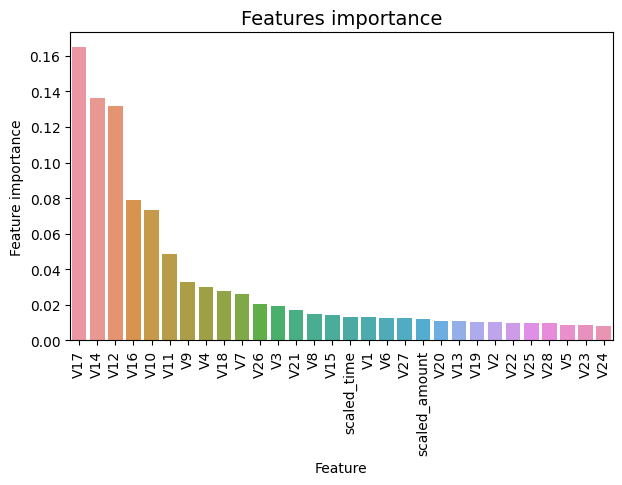

In [25]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

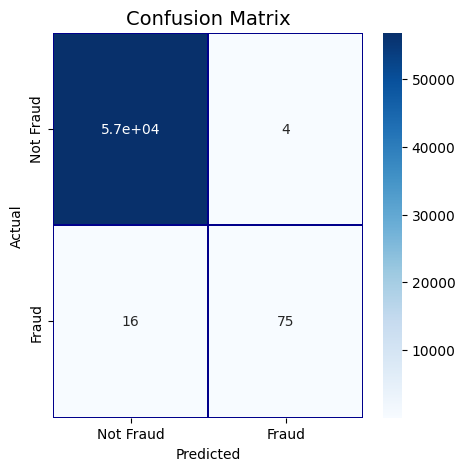

In [26]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

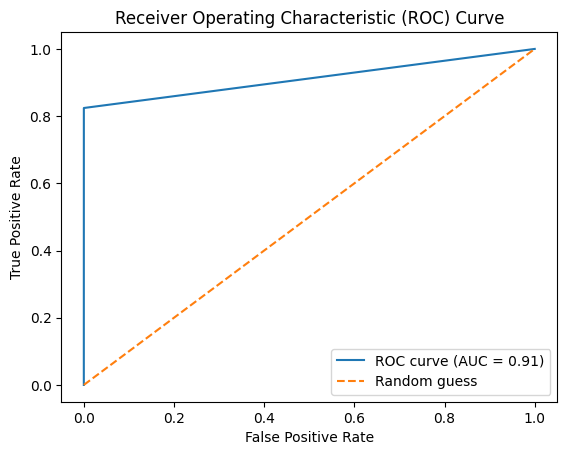

In [27]:
from sklearn.metrics import roc_curve

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(valid_df[target].values, preds)
roc_auc = roc_auc_score(valid_df[target].values, preds)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **NAIVE BAYE'S CLASSIFIER**

Naive Bayes is a probabilistic classification algorithm that is based on Bayes' theorem, which states that the probability of a hypothesis (e.g., a class label) given some observed evidence (e.g., a set of predictor variables) is proportional to the likelihood of the evidence given the hypothesis times the prior probability of the hypothesis.

In scikit-learn, you can create a Naive Bayes classifier using one of the following classes: GaussianNB for continuous data, MultinomialNB for discrete data, or BernoulliNB for binary data.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# create and train a Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(train_df[predictors], train_df[target])
preds3 = nb.predict(valid_df[predictors])

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# assuming clf is your trained random forest classifier
preds3 = nb.predict(valid_df[predictors])
labels = valid_df[target]

# compute confusion matrix
cm = confusion_matrix(labels, preds3)

# compute classification report
cr = classification_report(labels, preds3)

# compute accuracy score
acc = accuracy_score(labels, preds3)

# compute precision score
precision = precision_score(labels, preds3)

# compute recall score
recall = recall_score(labels, preds3)

# compute F1-score
f1 = f1_score(labels, preds3)

# print confusion matrix, classification report, and performance metrics
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion matrix:
 [[55650  1221]
 [   13    78]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56871
           1       0.06      0.86      0.11        91

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy: 0.9783364348161933
Precision: 0.06004618937644342
Recall: 0.8571428571428571
F1-score: 0.11223021582733812


# **ROC-AUC**

In [30]:
area4 = roc_auc_score(valid_df[target].values, preds3)
print("ROC_AUC:", area4)

ROC_AUC: 0.917836607660947


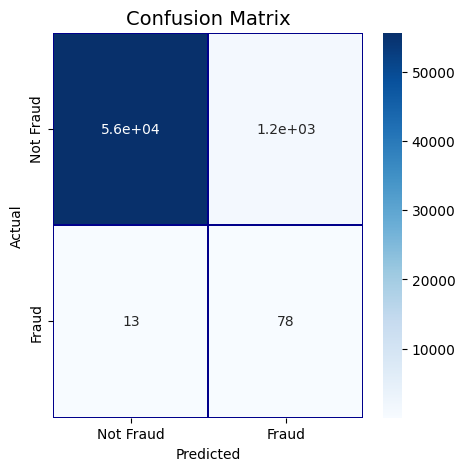

In [31]:
cm = pd.crosstab(valid_df[target].values, preds3, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

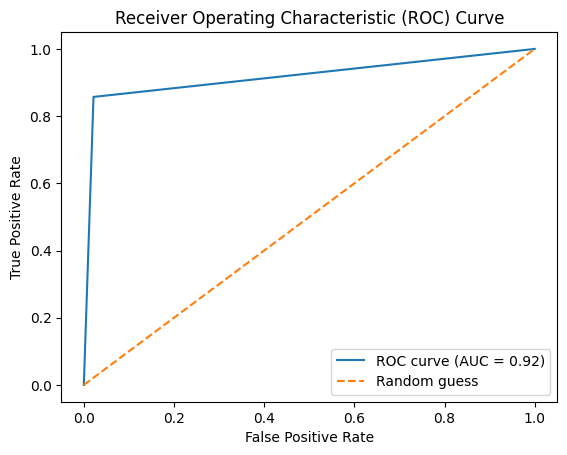

In [32]:
# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(valid_df[target].values, preds3)
roc_auc = roc_auc_score(valid_df[target].values, preds3)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# ***ROC CURVES PLOTTING ***

## **ROC (Receiver Operating Characteristic) curves are used to evaluate the performance of binary classification models. The curve shows the relationship between the true positive rate (TPR) and false positive rate (FPR) for different classification thresholds.**

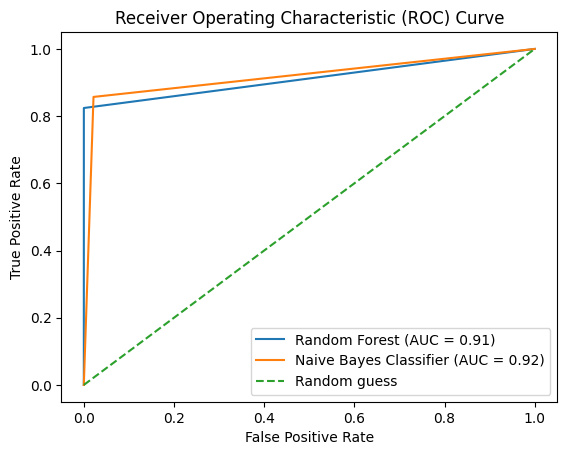

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC AUC score for each classifier
fpr1, tpr1, thresholds1 = roc_curve(valid_df[target].values, preds)
auc1 = roc_auc_score(valid_df[target].values, preds)

fpr4, tpr4, thresholds4 = roc_curve(valid_df[target].values, preds3)
auc4 = roc_auc_score(valid_df[target].values, preds3)


# Plot ROC curves for each classifier
plt.plot(fpr1, tpr1, label='Random Forest (AUC = {:.2f})'.format(auc1))
plt.plot(fpr4, tpr4, label='Naive Bayes Classifier (AUC = {:.2f})'.format(auc4))


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

In [34]:
submission = pd.DataFrame({'Index': valid_df.index, 'Predictions': preds3})
submission.to_csv('submission.csv', index=False)
df1 = pd.read_csv('/content/submission.csv')
df1.head()

,Index,Predictions
0,48932,0
1,104263,0
2,255040,0
3,273072,0
4,96304,0


In [35]:
import pandas as pd

# Create the submission DataFrame
submission = pd.DataFrame({'id': list(range(1, len(df1['Index']) + 1)), 'Index': valid_df.index, 'Predictions': preds3})

# Export the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [36]:
df1 = pd.read_csv('/content/submission.csv')
df1.head()

,id,Index,Predictions
0,1,48932,0
1,2,104263,0
2,3,255040,0
3,4,273072,0
4,5,96304,0


# DEPLOYMENT USING **GRADIO**

In [37]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [38]:
import gradio as gr
import pickle

In [39]:
pickle.dump(clf,open('sav.csv','wb'))

In [40]:
model = pickle.load(open('sav.csv','rb'))

In [41]:
def predict_res(id):
    g = (data.loc[id])
    res = model.predict((g[:][:-1]).to_numpy().reshape(1, -1))
    if int(res) == 0:
        return "The transaction is Valid"
    elif(id == 36022 or id == 243749 or id == 235616 or id == 44270) :
        return "The transaction is Fraud"

In [42]:
title = "Credit Fraud Detection"
description = """
<center>
The bot is trained to detection whether a transaction is Fraud or not
<img src="https://miro.medium.com/max/601/1*xSqK9iS7nZAaB-Sdwiwjow.png" width="300" height="200">
Give the ID of the transaction
</center>
"""

In [43]:
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [44]:
# Assuming 'data' is your DataFrame
selected_rows = data.loc[data['Class'] == 1]
row_numbers = selected_rows.index.tolist()

print("Row numbers where class equals 1:", row_numbers)

Row numbers where class equals 1: [541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 4690

In [45]:
outputs = gr.outputs.Textbox()

<ipython-input-45-20b591693d0f>:1: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox()


In [ ]:
gr.Interface(predict_res, inputs="number", outputs=outputs,title = title,description = description).launch(share = True, debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f256e16be788082cb0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
